## Problem Statement :-

Build the Machine learning model using different Algorithm in Diabetes Data Set to predict Weather a person suffer from diabetes or not.

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data set

In [2]:
data = pd.read_csv("diabetes.csv")

### Print the first 5 rows of the dataframe.

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Print the last 5 rows of the dataframe.

In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Size of data set 

In [5]:
data.shape

(768, 9)

There are 768 rows and 9 columns in the Diabetes data set.

### print columns of data set

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Check data type of columns

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check there is any nan value or not

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no nan value present in diabetes data set.

### Statistical Analysis of Diabetes data set

The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Exploratory Data Analysis (EDA)

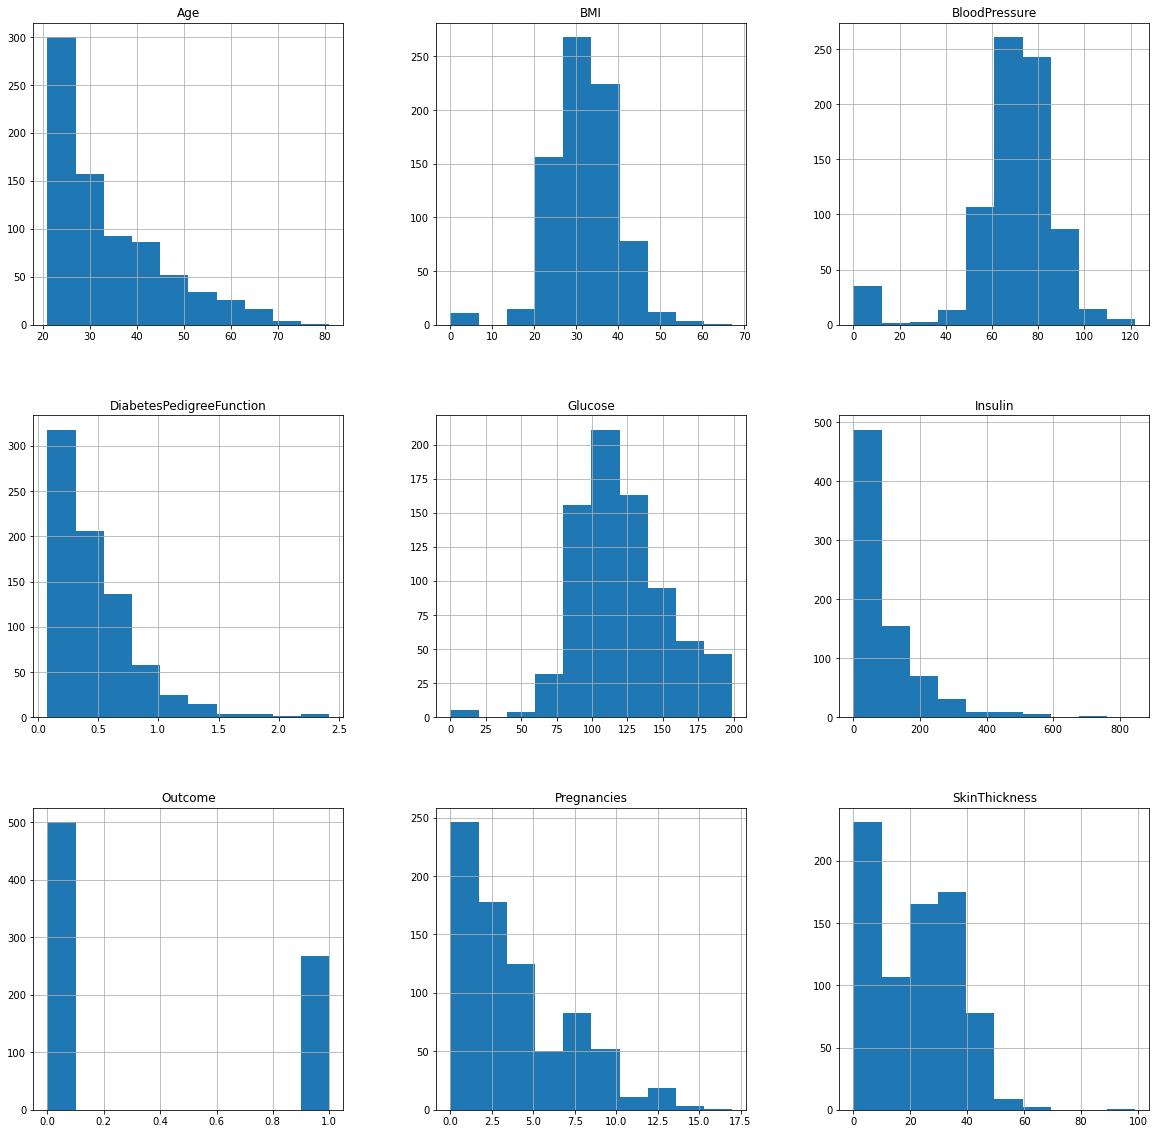

In [10]:
data.hist(figsize = (20,20))
plt.show()

Following columns or variables have an invalid zero value:

Glucose

BloodPressure

SkinThickness

Insulin

BMI

Which does not make any sense so, we replace these value with its mean value.

In [11]:
data["Glucose"] = data["Glucose"].replace(0,data["Glucose"].mean())

In [12]:
data["BloodPressure"] = data["BloodPressure"].replace(0,data["BloodPressure"].mean())

In [13]:
data["SkinThickness"] = data["SkinThickness"].replace(0,data["SkinThickness"].mean())

In [14]:
data["Insulin"] = data["Insulin"].replace(0,data["Insulin"].mean())

In [15]:
data["BMI"] = data["BMI"].replace(0,data["BMI"].mean())

In [16]:
# data after replacing 0 value with mean value

In [17]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


##### Plotting after Zero value removal

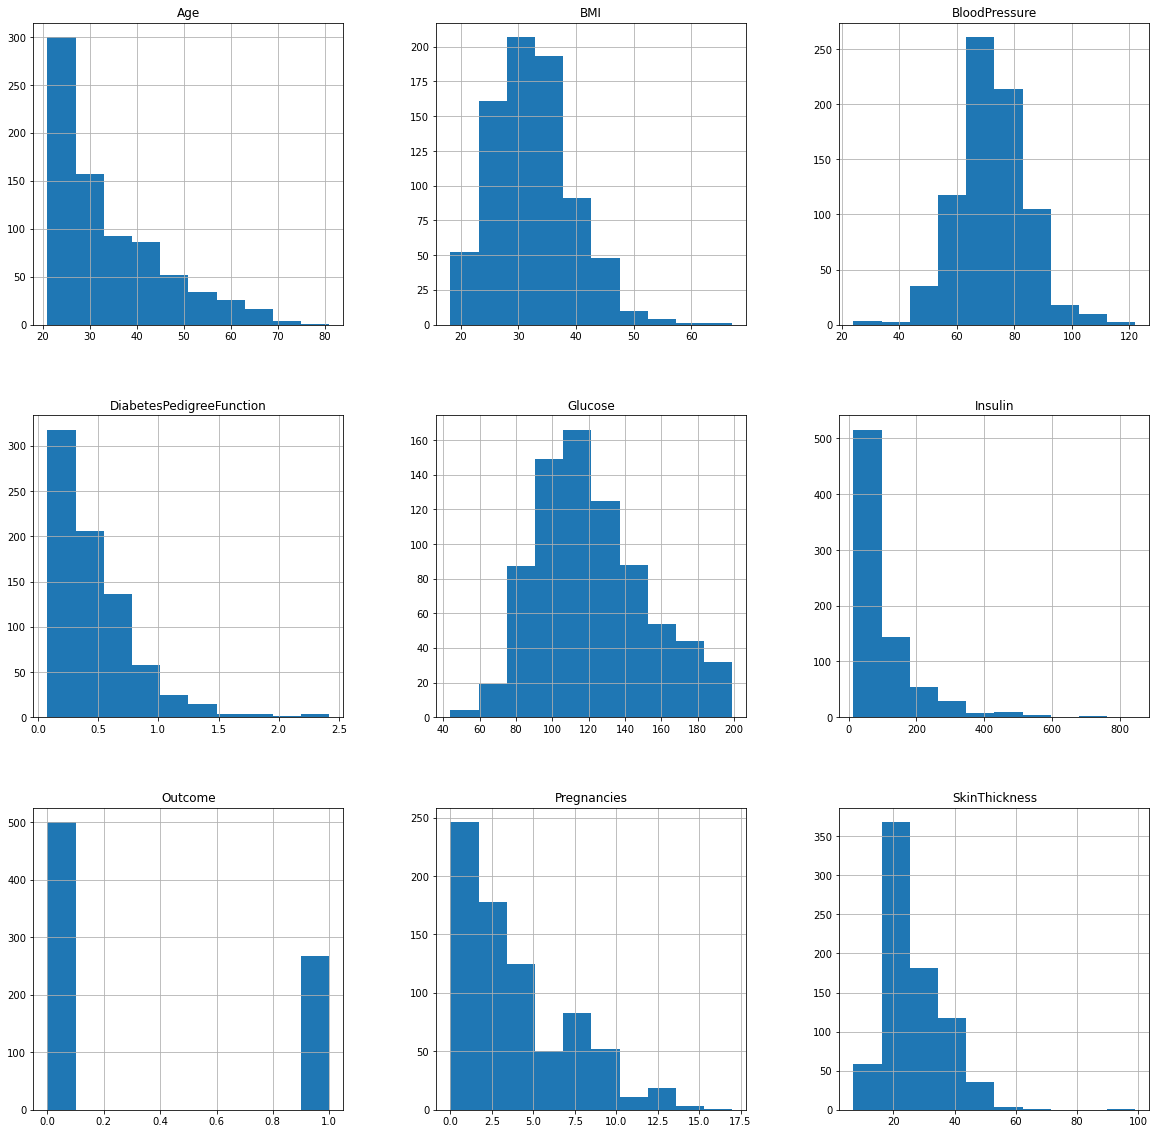

In [18]:
data.hist(figsize = (20,20))
plt.show()

#### Check for Outilers

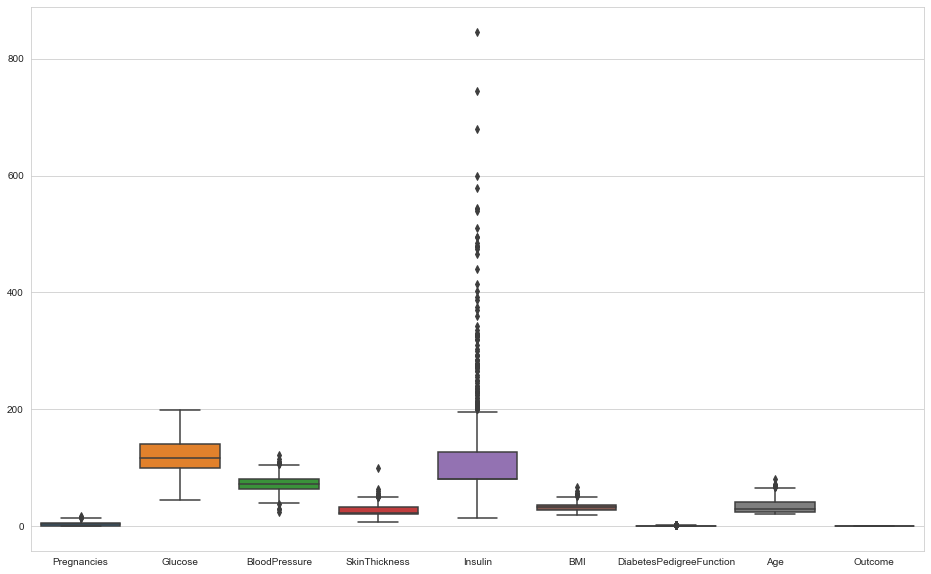

In [19]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.boxplot(data = data)
plt.show()

"BMI","Pregnancies","BloodPressure","SkinThickness","Insulin","Age" columns contain Outilers.

##### Display percentage of Outilers 

In [20]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Pregnancies outliers = 0.52%
Column Glucose outliers = 0.00%
Column BloodPressure outliers = 2.21%
Column SkinThickness outliers = 1.56%
Column Insulin outliers = 11.59%
Column BMI outliers = 1.04%
Column DiabetesPedigreeFunction outliers = 3.78%
Column Age outliers = 1.17%
Column Outcome outliers = 0.00%


##### find the relationships between independent variables and dependent variable

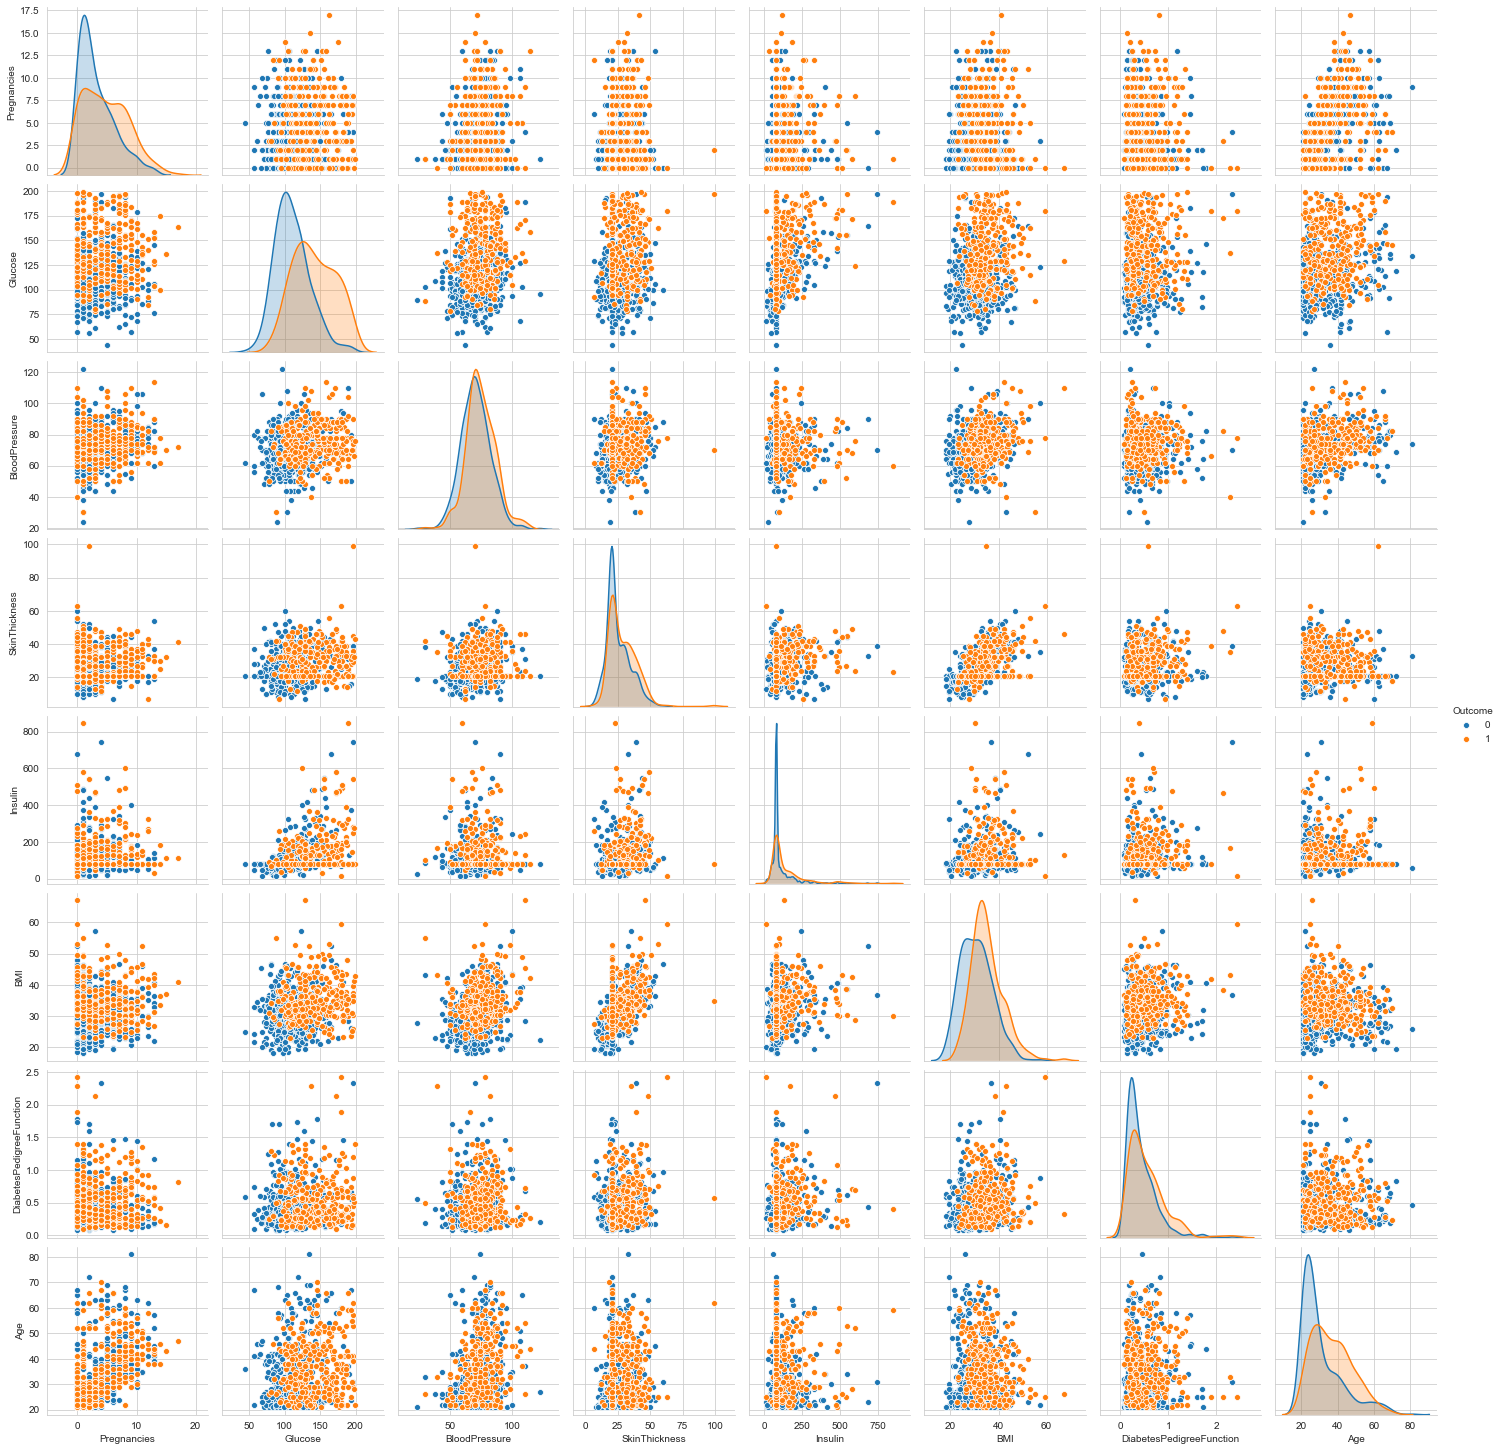

In [21]:
sns.pairplot(data = data,hue = "Outcome")

There are clearly visible In the data set we cannot draw a best fit line.

In [22]:
#### Let us show distribution of data

In [23]:
y = data["Outcome"]
df = data.copy()

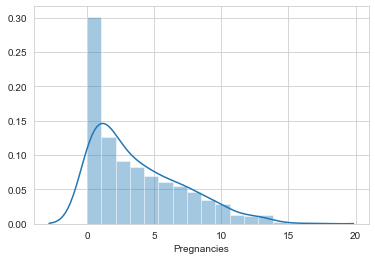

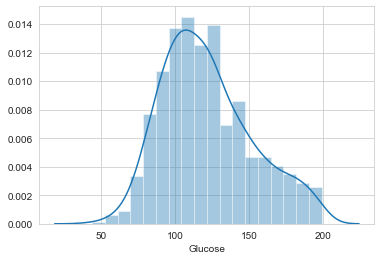

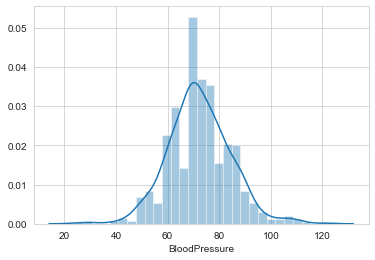

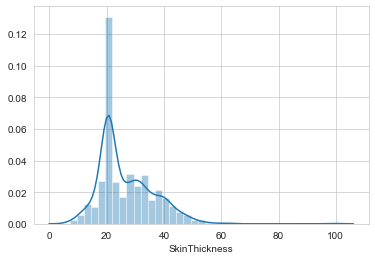

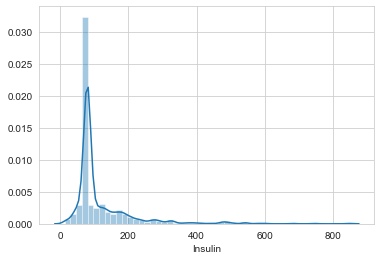

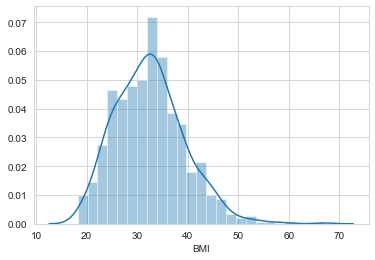

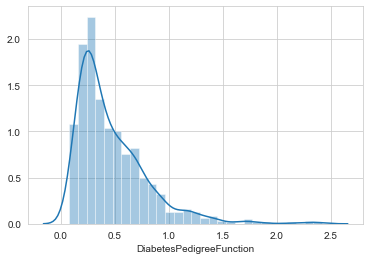

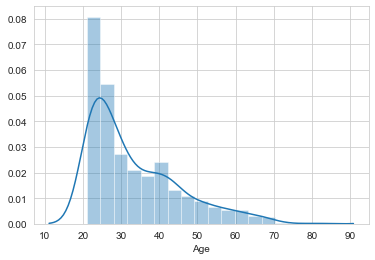

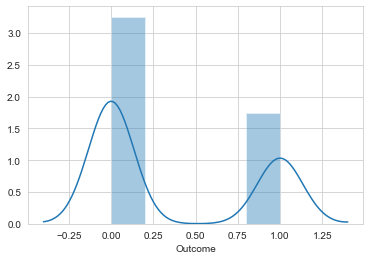

In [24]:
for column in df.columns :
    sns.distplot(df[column])
    plt.show()

All Column show skewed behavior.

##### Correlation between variables

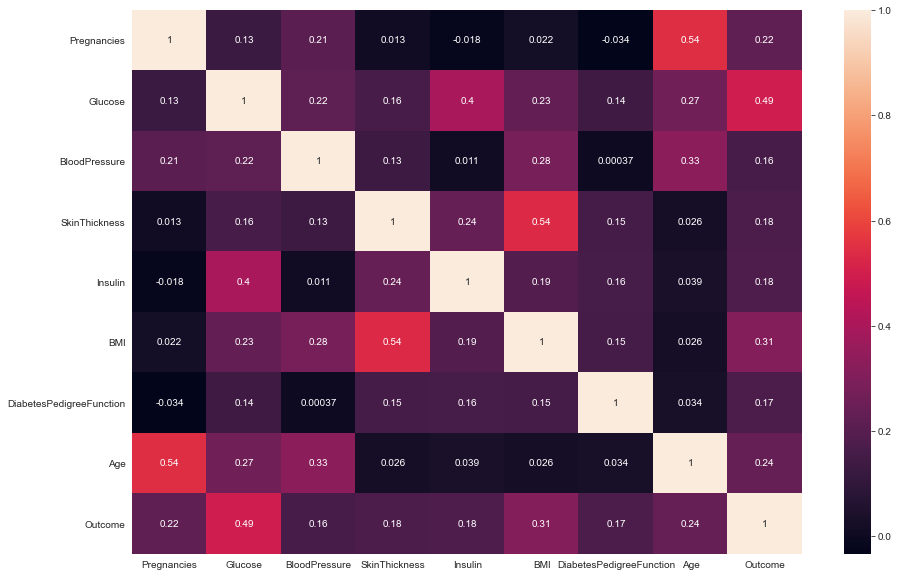

In [25]:
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data=data.corr(), annot=True)

In [26]:
#correlation value of "price" column with other columns
data.corr()['Outcome'][:-1].sort_values(ascending=False)

Glucose                     0.492908
BMI                         0.312254
Age                         0.238356
Pregnancies                 0.221898
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

#### checking the balance of the data by plotting the count of outcomes by their value

In [27]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

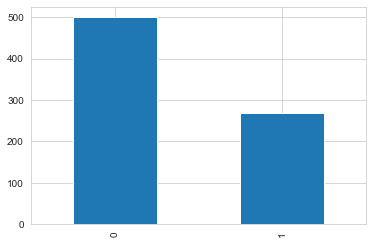

In [28]:
y.value_counts().plot(kind = 'bar')
plt.show()

The above graph shows that the data is biased towards data points having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

#### Normalization

In [29]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt

In [30]:
## Function to check normal distribution 

In [31]:
def plot_data(d,feature) :
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    d[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(d[feature],dist = 'norm',plot=pylab)
    plt.show()

If our data is not normally distributed then we transform it.

1) for "Glucose" Column 

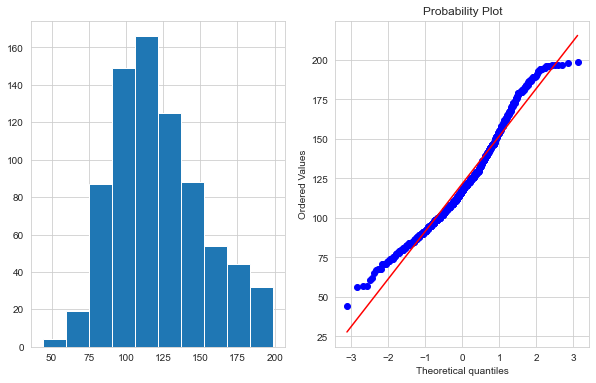

In [32]:
plot_data(df, "Glucose")

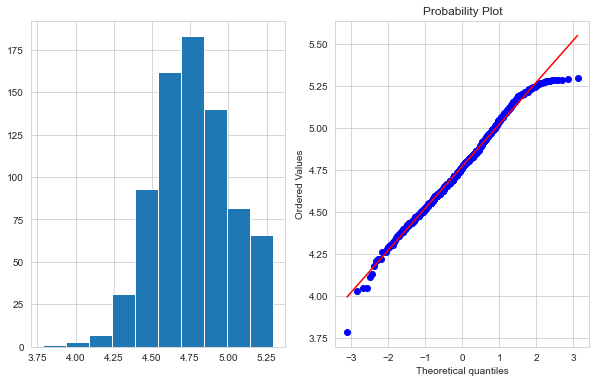

In [33]:
# Using logarithmic Transformation
df['log_Glucose'] = np.log(df['Glucose'])
plot_data(df,'log_Glucose')

##### Observation : logarithmic Transformation is best fit for "Glucose" Column

2) for "BMI" Column

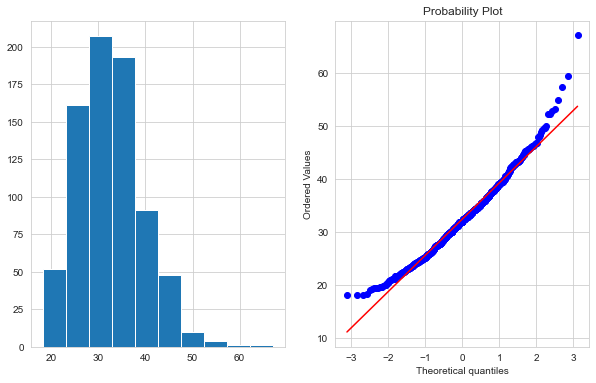

In [34]:
plot_data(df, "BMI")

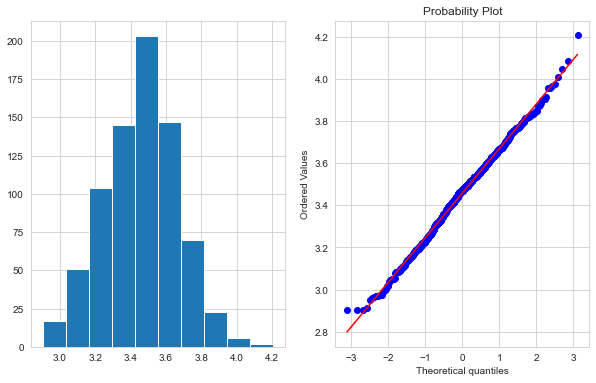

In [35]:
# Using Logarithmic Transformation
df['log_BMI'] = np.log(df['BMI'])
plot_data(df,'log_BMI')

##### Observation : logarithmic Transformation is best fit for "BMI" Column

3) for "Age" Column

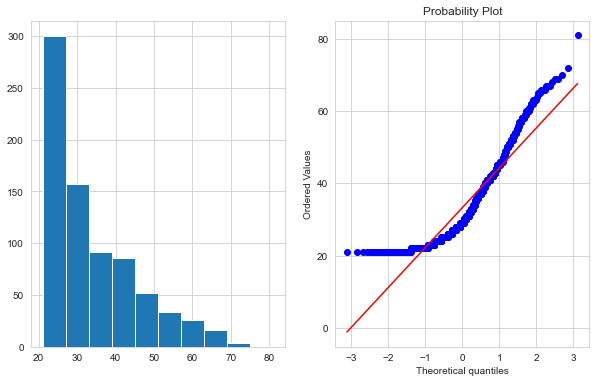

In [36]:
plot_data(df, "Age")

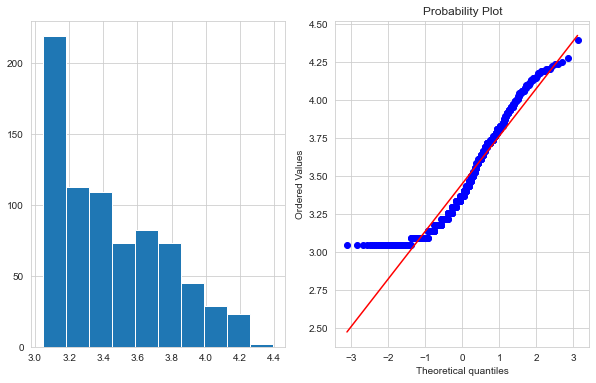

In [37]:
# Using Logarithmic Transformation
df['log_Age'] = np.log(df['Age'])
plot_data(df,'log_Age')

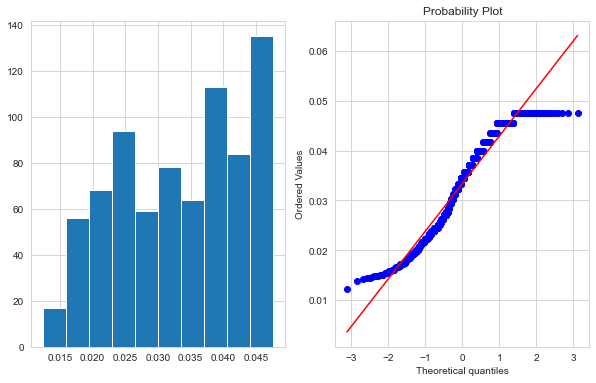

In [38]:
# Using Reciprocal Transformation
df['Reci_Age'] = 1/df['Age']
plot_data(df,'Reci_Age')

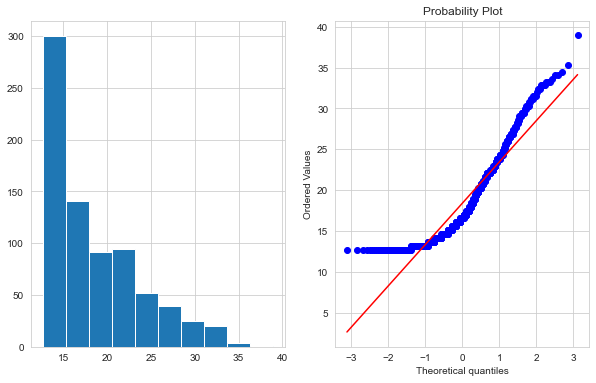

In [39]:
# Using Exponential  Transformation
df['Exp_Age'] = df['Age']**(1/1.2)
plot_data(df,'Exp_Age')

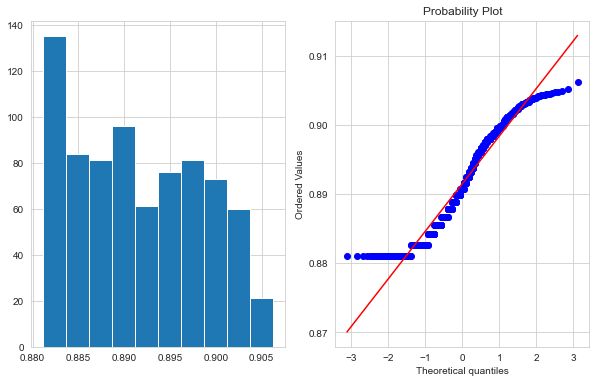

In [40]:
# Using Boxcox Transformation 
df['Box_Age'],parameter = stat.boxcox(df['Age'])
plot_data(df,'Box_Age')

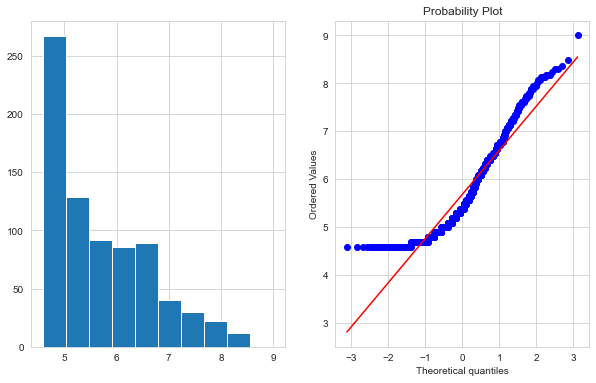

In [41]:
# Using Square root Transformation 
df['Sq_Age'] = np.sqrt(df['Age'])
plot_data(df,'Sq_Age')

#### Observation : Logarithmic Transformation is best fit for "Age" Column

4) For "Pregnancies" Column

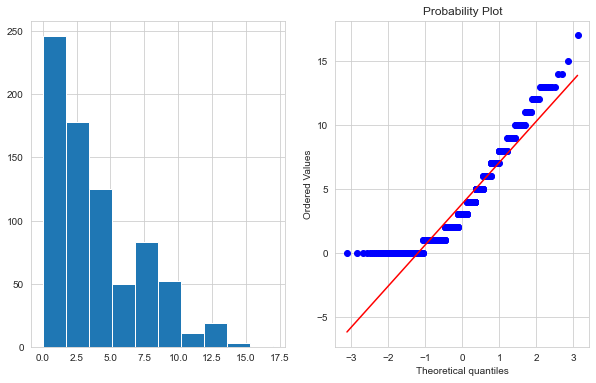

In [42]:
plot_data(df,'Pregnancies')

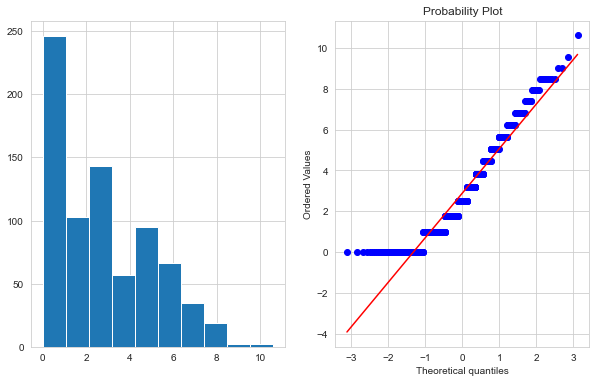

In [43]:
# Using Exponential  Transformation
df['Exp_Pregnancies'] = df['Pregnancies']**(1/1.2)
plot_data(df,'Exp_Pregnancies')

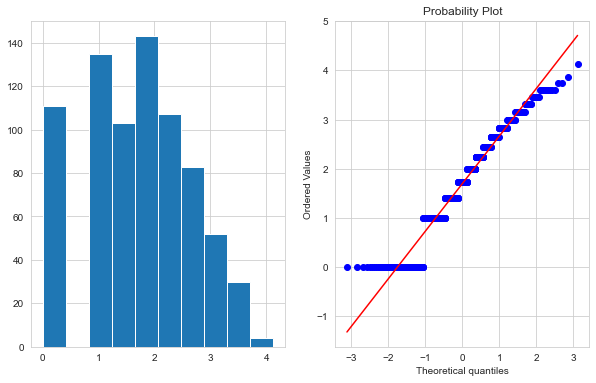

In [44]:
# Using Square root Transformation 
df['Sq_Pregnancies'] = np.sqrt(df['Pregnancies'])
plot_data(df,'Sq_Pregnancies')

#### Observation : Square root Transformation is best fit for "Pregnancies" Column

5) For "Insulin" Column

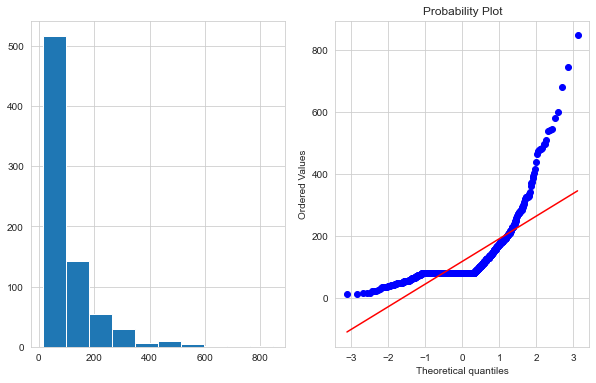

In [45]:
plot_data(df,'Insulin')

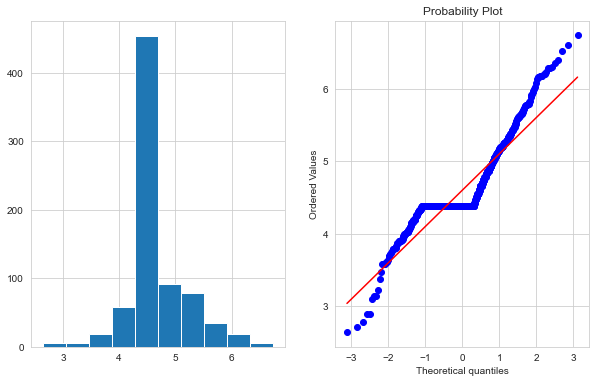

In [46]:
# Using logarithmic Transformation
df['log_Insulin'] = np.log(df['Insulin'])
plot_data(df,'log_Insulin')

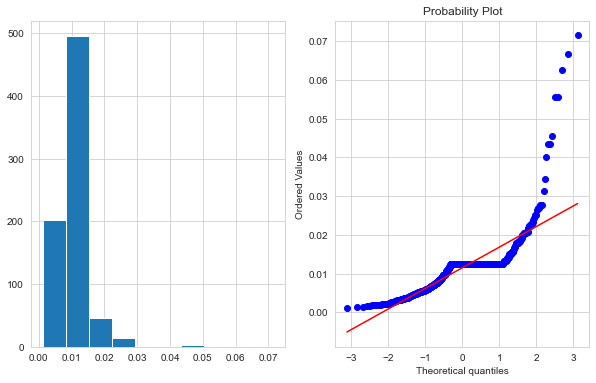

In [47]:
# Using Reciprocal Transformation
df['Reci_Insulin'] = 1/df['Insulin']
plot_data(df,'Reci_Insulin')

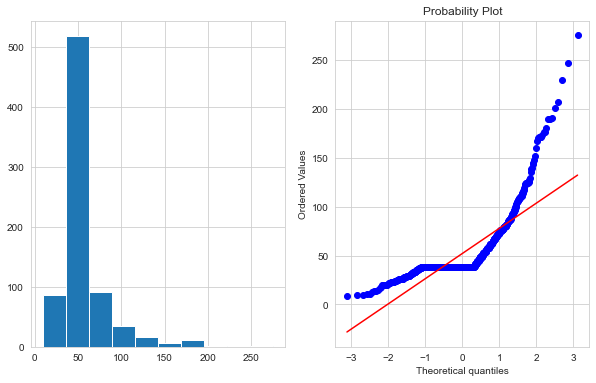

In [48]:
# Using Exponential  Transformation
df['Exp_Insulin'] = df['Insulin']**(1/1.2)
plot_data(df,'Exp_Insulin')

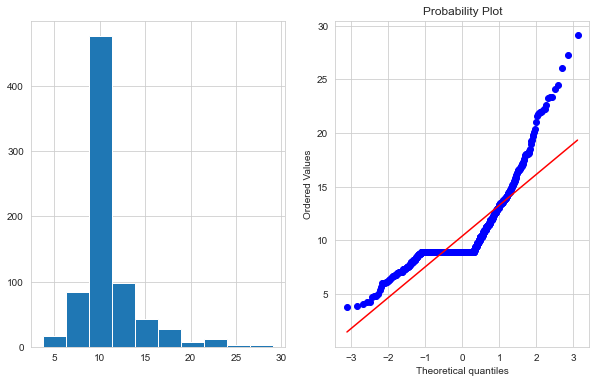

In [49]:
# Using Square root Transformation 
df['Sq_Insulin'] = np.sqrt(df['Insulin'])
plot_data(df,'Sq_Insulin')

##### Observation : Reciprocal Transformation is best fit for "Insulin" Column

6) for "SkinThickness" Column

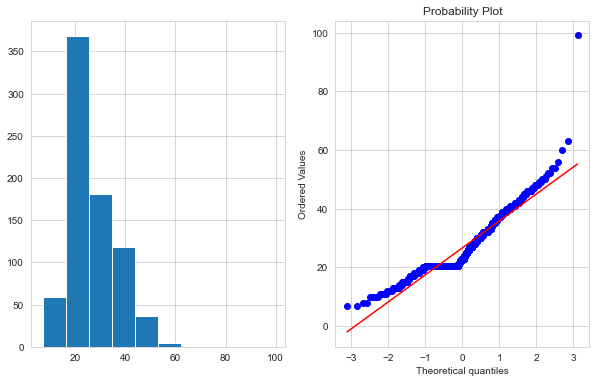

In [50]:
plot_data(df,'SkinThickness')

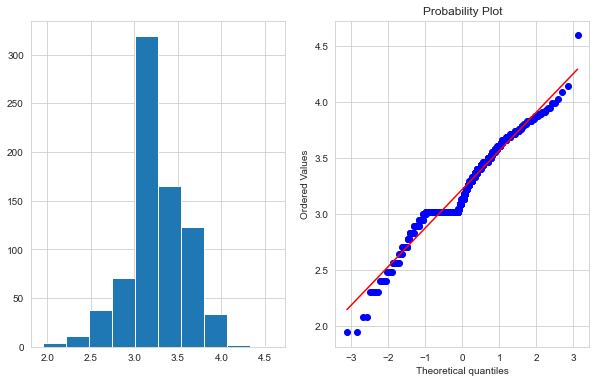

In [51]:
# Using logarithmic Transformation
df['log_SkinThickness'] = np.log(df['SkinThickness'])
plot_data(df,'log_SkinThickness')

##### Observation : logarithmic Transformation is best fit for "SkinThickness" Column

7) for "DiabetesPedigreeFunction" Column

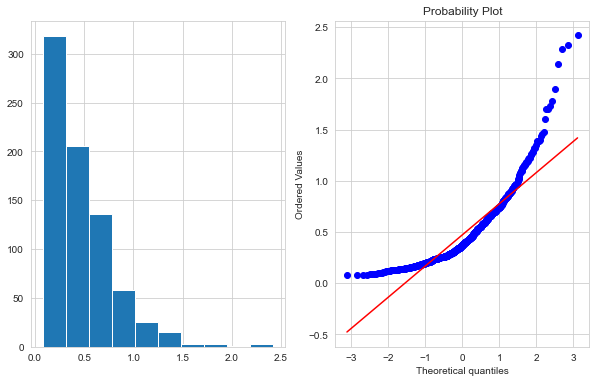

In [52]:
plot_data(df,'DiabetesPedigreeFunction')

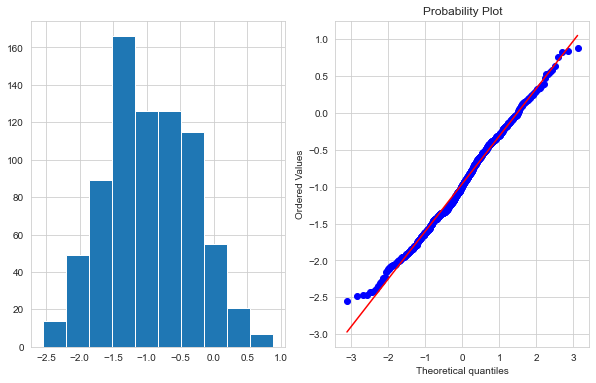

In [53]:
# Using logarithmic Transformation
df['log_DiabetesPedigreeFunction'] = np.log(df['DiabetesPedigreeFunction'])
plot_data(df,'log_DiabetesPedigreeFunction')

##### Observation : logarithmic Transformation is best fit for "DiabetesPedigreeFunction" Column¶

8) for "BloodPressure" Column

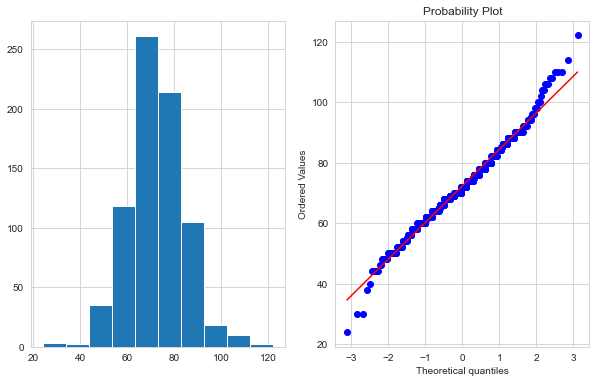

In [54]:
plot_data(df,'BloodPressure')

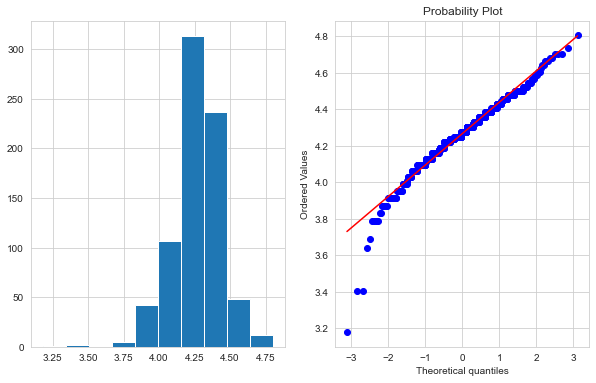

In [55]:
# Using logarithmic Transformation
df['log_BloodPressure'] = np.log(df['BloodPressure'])
plot_data(df,'log_BloodPressure')

##### Observation : logarithmic Transformation is best fit for "BloodPressure" Column

##### Data set after Normalization

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,log_Glucose,...,Sq_Age,Exp_Pregnancies,Sq_Pregnancies,log_Insulin,Reci_Insulin,Exp_Insulin,Sq_Insulin,log_SkinThickness,log_DiabetesPedigreeFunction,log_BloodPressure
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,4.997212,...,7.071068,4.451018,2.449490,4.379517,0.012531,38.459182,8.933055,3.555348,-0.466809,4.276666
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,4.442651,...,5.567764,1.000000,1.000000,4.379517,0.012531,38.459182,8.933055,3.367296,-1.046969,4.189655
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,5.209486,...,5.656854,5.656854,2.828427,4.379517,0.012531,38.459182,8.933055,3.022202,-0.397497,4.158883
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,4.488636,...,4.582576,1.000000,1.000000,4.543295,0.010638,44.083210,9.695360,3.135494,-1.789761,4.189655
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,4.919981,...,5.744563,0.000000,0.000000,5.123964,0.005952,71.519489,12.961481,3.555348,0.827678,3.688879


In [57]:
dataset = df[["log_BMI","log_Glucose","log_Age","Sq_Pregnancies","Reci_Insulin","log_SkinThickness","log_DiabetesPedigreeFunction","log_BloodPressure","Outcome"]] 

In [58]:
dataset.head()

,log_BMI,log_Glucose,log_Age,Sq_Pregnancies,Reci_Insulin,log_SkinThickness,log_DiabetesPedigreeFunction,log_BloodPressure,Outcome
0,3.514526,4.997212,3.912023,2.449490,0.012531,3.555348,-0.466809,4.276666,1
1,3.280911,4.442651,3.433987,1.000000,0.012531,3.367296,-1.046969,4.189655,0
2,3.148453,5.209486,3.465736,2.828427,0.012531,3.022202,-0.397497,4.158883,1
3,3.335770,4.488636,3.044522,1.000000,0.010638,3.135494,-1.789761,4.189655,0
4,3.763523,4.919981,3.496508,0.000000,0.005952,3.555348,0.827678,3.688879,1


### Standardization

In [59]:
x = dataset.drop(columns = 'Outcome')
y = dataset["Outcome"]

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scalar = StandardScaler()
X_Scaled = scalar.fit_transform(x)

In [62]:
X_Scaled

array([[ 0.27009922,  0.90856252,  1.43637931, ...,  0.95720591,
         0.76584846,  0.06379277],
       [-0.83876157, -1.31367612, -0.04593931, ...,  0.42067547,
        -0.13515874, -0.43414786],
       [-1.46747726,  1.75918707,  0.05250873, ..., -0.56390989,
         0.87349186, -0.61024505],
       ...,
       [-0.91068013,  0.10142474, -0.14761572, ..., -0.24067602,
        -0.69351704,  0.06379277],
       [-0.25202375,  0.26368185,  1.2445128 , ..., -0.56390989,
        -0.14403323, -0.97958011],
       [-0.2049503 , -0.95323526, -0.97152211, ...,  0.61095214,
        -0.30321784, -0.09742091]])

In [63]:
dataset_scaled = pd.DataFrame(X_Scaled,columns=dataset.columns[:-1])
dataset_scaled.head()

,log_BMI,log_Glucose,log_Age,Sq_Pregnancies,Reci_Insulin,log_SkinThickness,log_DiabetesPedigreeFunction,log_BloodPressure
0,0.270099,0.908563,1.436379,0.765422,0.158418,0.957206,0.765848,0.063793
1,-0.838762,-1.313676,-0.045939,-0.706001,0.158418,0.420675,-0.135159,-0.434148
2,-1.467477,1.759187,0.052509,1.150094,0.158418,-0.563910,0.873492,-0.610245
3,-0.578375,-1.129404,-1.253612,-0.706001,-0.131039,-0.240676,-1.288739,-0.434148
4,1.451972,0.599081,0.147927,-1.721134,-0.847514,0.957206,2.776227,-3.299938


#### Splitting Of Data Into Train And test

In [64]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X_Scaled,y,test_size = 0.33 , random_state = 300)

In [65]:
x_train.shape , x_test.shape

((514, 8), (254, 8))

#### Implementation of Ml Algorithms 

#### Using KNN Algorithm :

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
from sklearn.metrics import classification_report , confusion_matrix

In [68]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
# Predicate value
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [70]:
### R2 Score of model
knn.score(x_train,y_train)

0.811284046692607

In [71]:
knn.score(x_test,y_test)

0.7283464566929134

In [72]:
### Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[143,  28],
       [ 41,  42]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       171
           1       0.60      0.51      0.55        83

    accuracy                           0.73       254
   macro avg       0.69      0.67      0.68       254
weighted avg       0.72      0.73      0.72       254



#### let try to increase the accuracy by using hyperparameter tuning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [76]:
gridsearch = GridSearchCV(knn,param_grid,verbose = 3)

In [77]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.718, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.667, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.748, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.706, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.718, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.777, total=

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, score=0.716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=12, score=0.738, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.718, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.718, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.738, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=5, score=0.657, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.738, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=7, score=0.748, total= 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=10, score=0.725, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.796, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.709, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, score=0.728, 

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.767, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.709, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=13, score=0.716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=3, score=0.709, to

[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.706, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.718, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=k

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.767, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.709, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, score=0.716, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.718, total=   0.0s
[CV

[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=7, score=0.706, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.718, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.796, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=9 ..................
[CV]  algorithm=k

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.738, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=12, score=0.706, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=13, score=0.767, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.738, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.767, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=7, score=0.706, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=34, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=34, n_neighbors=9, score=0.718, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.706, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.767, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.709, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.716, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, score=0.709, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.706, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.718, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.796, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.716, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=10, score=0.777, total=   0.0s
[CV] algorithm=brute

[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.738, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=12, score=0.706, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=13, score=0.767, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.718, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.718, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.738, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=5, score=0.657, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.738, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.728, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.738, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.706, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=13, score=0.748, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   13.5s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [78]:
## best parameters according to GridSearchCV 

In [79]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [80]:
## we use the best parameter in our knn algorithm  

In [81]:
knn = KNeighborsClassifier(algorithm = 'ball_tree' ,leaf_size = 18,n_neighbors=9)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=9)

In [83]:
### R2 Score of model
knn.score(x_train,y_train)

0.791828793774319

In [84]:
knn.score(x_test,y_test)

0.7440944881889764

Accuracy for training data set has decreased, maybe our model was overfitting the data before

In [85]:
y_pred = knn.predict(x_test)

In [86]:
## Confusion Metric 
confusion_matrix(y_test,y_pred)

array([[140,  31],
       [ 34,  49]], dtype=int64)

#### Choosing a K Value

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
accuracy_rate = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,dataset_scaled,dataset['Outcome'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'accuracy_rate')

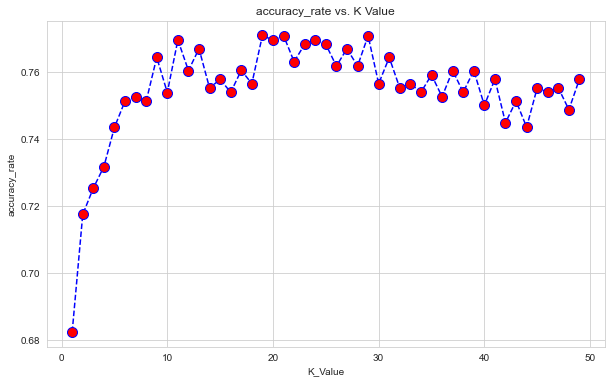

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy_rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('accuracy_rate')

In [90]:
error_rate = []
    
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,dataset_scaled,dataset['Outcome'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

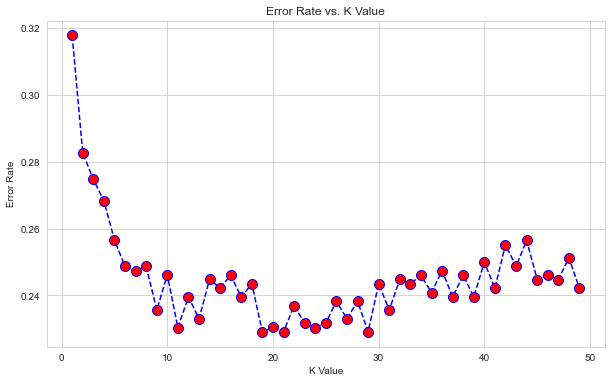

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o' ,markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Here we can see that at K = 21 Error rate is very low and accuracy rate is high.

In [92]:
# For K=21

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [93]:
knn.score(x_train,y_train)

0.77431906614786

In [94]:
knn.score(x_test,y_test)

0.7834645669291339

In [95]:
y_pred = knn.predict(x_test)

In [96]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [97]:
confusion_matrix(y_test,y_pred)

array([[147,  24],
       [ 31,  52]], dtype=int64)

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       171
           1       0.68      0.63      0.65        83

    accuracy                           0.78       254
   macro avg       0.76      0.74      0.75       254
weighted avg       0.78      0.78      0.78       254



#### Using Naive Bayes Algorithm :

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [101]:
model.fit(x_train,y_train)

GaussianNB()

In [103]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [104]:
### R2 Score of model
model.score(x_train,y_train)

0.754863813229572

In [105]:
model.score(x_test,y_test)

0.7795275590551181

In [106]:
confusion_matrix(y_test,y_pred)

array([[140,  31],
       [ 25,  58]], dtype=int64)

#### Using SVM Algorithm :

In [107]:
from sklearn.svm import SVC

In [109]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [110]:
y_pred = model.predict(x_test)

In [111]:
### R2 Score of model
model.score(x_train,y_train)

0.8093385214007782

In [112]:
model.score(x_test,y_test)

0.7874015748031497

In [113]:
confusion_matrix(y_test,y_pred)

array([[150,  21],
       [ 33,  50]], dtype=int64)

#### let try to increase the accuracy by using hyperparameter tuning

In [114]:
param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1,0.5,0.1,0.01,0.001]}

In [115]:
grid= GridSearchCV(SVC(),param_grid, verbose=3, n_jobs=-1)

In [116]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.0s finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500],
                         'gamma': [1, 0.5, 0.1, 0.01, 0.001]},
             verbose=3)

In [117]:
grid.best_params_

{'C': 50, 'gamma': 0.001}

In [118]:
model_new=SVC(C=50, gamma=0.001)
model_new.fit(x_train,y_train)

SVC(C=50, gamma=0.001)

In [119]:
### R2 Score of model
model_new.score(x_train,y_train)

0.7645914396887159

In [120]:
model_new.score(x_test,y_test)

0.7795275590551181

In [121]:
confusion_matrix(y_test,model_new.predict(x_test))

array([[150,  21],
       [ 35,  48]], dtype=int64)

#### Save a model

##### We use SVM model for Predication 

In [122]:
import pickle

with open('SVM_Prediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)